## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

time: 0 ns (started: 2024-12-29 17:54:47 +02:00)


## Dwonload Dataset

In [12]:

!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq


time: 9.09 s (started: 2024-12-29 17:54:47 +02:00)


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
From (redirected): https://drive.google.com/uc?id=1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq&confirm=t&uuid=97c340d1-e000-4d0e-8c4b-a1a57b871ba9
To: d:\madmah\deep learning course\matalot\matala1\sign-language-recognition\dataset_labels.npz

  0%|          | 0.00/31.4M [00:00<?, ?B/s]
  2%|▏         | 524k/31.4M [00:00<00:16, 1.92MB/s]
  7%|▋         | 2.10M/31.4M [00:00<00:04, 6.47MB/s]
 17%|█▋        | 5.24M/31.4M [00:00<00:01, 14.2MB/s]
 28%|██▊       | 8.91M/31.4M [00:00<00:01, 20.7MB/s]
 40%|████      | 12.6M/31.4M [00:00<00:00, 25.1MB/s]
 52%|█████▏    | 16.3M/31.4M [00:00<00:00, 28.5MB/s]
 63%|██████▎   | 19.9M/31.4M [00:00<00:00, 29.4MB/s]
 75

Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [13]:
loaded_data = np.load('dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 63 ms (started: 2024-12-29 17:54:56 +02:00)


## Data preprocessing (10%)

### Select two classes (0 and 5)

In [14]:
mask = (y == "0") | (y == "5")
X_filtered = X[mask]
Y_filtered = y[mask]

print(f'Y_filtered: {Y_filtered.shape} \n X_filtered: {X_filtered.shape} \n Y_filtered: {Y_filtered[495:505]}')

Y_filtered: (1000,) 
 X_filtered: (1000, 784) 
 Y_filtered: ['0' '0' '0' '0' '0' '5' '5' '5' '5' '5']
time: 0 ns (started: 2024-12-29 17:54:56 +02:00)


italicized text### Normalizing the data

1. Change the pixels values from (0-255) to (0-1)
2. Change the labels value from ("0","5") to (0,1)



In [15]:
X = X_filtered/255.0
Y = (Y_filtered == "5").astype(int)

X = X.T
Y = Y.reshape(1, Y.shape[0])


print(Y.shape)
print(X.shape)


(1, 1000)
(784, 1000)
time: 15 ms (started: 2024-12-29 17:54:56 +02:00)


### Split the data into Train set and Test set


In [16]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)

# # Only np
# indices = np.random.permutation(len(X))

# # Calculate the split point
# split_point = int(0.8 * len(X))

# # Split the data using the indices
# X_train, X_test = X[indices[:split_point]].T, X[indices[split_point:]].T
# Y_train, Y_test = Y[indices[:split_point]], Y[indices[split_point:]]

# print(f' X_train: {X_train.shape}\n Y_train: {Y_train.shape}\n X_test: {X_test.shape}\n Y_test: {Y_test.shape}')
# print(f' Y_train exmple: {Y_train[0:10]}')


indices = np.random.permutation(X.shape[1])  # Use X.shape[1] = 1000 for total number of samples

# Calculate the split point
split_point = int(0.8 * X.shape[1])

# Split the data
X_train, X_test = X[:, indices[:split_point]], X[:, indices[split_point:]]
Y_train, Y_test= Y[:, indices[:split_point]], Y[:, indices[split_point:]]

print(f'X_train: {X_train.shape}')
print(f'Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'Y_test: {Y_test.shape}')

# Example of Y_train
print(f'Y_train example: {Y_train[:, :10]}')


X_train: (784, 800)
Y_train: (1, 800)
X_test: (784, 200)
Y_test: (1, 200)
Y_train example: [[0 0 1 0 1 0 1 0 1 1]]
time: 47 ms (started: 2024-12-29 17:54:56 +02:00)


### Test yourself

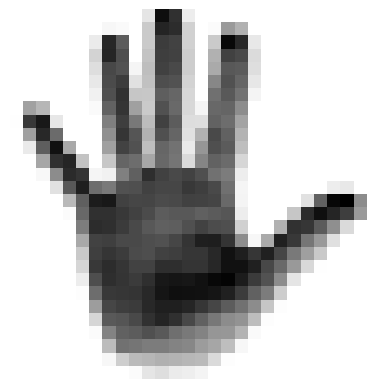

1

time: 172 ms (started: 2024-12-29 17:54:56 +02:00)


In [17]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[0,i]

## Activation functions (10%)

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(f' sigmoid 0: {sigmoid(0)}\n sigmoid 1: {sigmoid(1)}\n sigmoid 2 : {sigmoid(2)}')


# Derivative of sigmoid function
def sigmoid_derivative(x): # d/dx(1/(1 + e^(-x))) = e^(-x)/(1 + e^(-x))^2 = 1/(e^x + 1) - 1/(e^x + 1)^2 = 1/(e^x + 1) * (1 - 1/(e^x + 1))
    return sigmoid(x) * (1 - sigmoid(x))

 sigmoid 0: 0.5
 sigmoid 1: 0.7310585786300049
 sigmoid 2 : 0.8807970779778823
time: 0 ns (started: 2024-12-29 17:54:56 +02:00)


## Loss Function (10%)

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, you must be aware of the range of values that cause the logarithm to yield infinity or negative infinity. Ensure you handle these edge cases within your function.**


In [19]:
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''

    # if (y_hat == y):
    #   return 0.0

    closeToZero = 1e-15  # very small value in order to avoid log(0)
    y_hat = np.clip(y_hat, closeToZero, 1 - closeToZero)
    # print(f' y_hat {y_hat}')
    loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

print("Loss for y=1, y_hat=1:", log_loss(1, 1))      # Perfect prediction
print("Loss for y=0, y_hat=0:", log_loss(0, 0))      # Perfect prediction
print("Loss for y=1, y_hat=0:", log_loss(0, 1))      # Total divergence
print("Loss for y=0, y_hat=1:", log_loss(1, 0))      # Total divergence
print("Loss for y=1, y_hat=0.5:", log_loss(0.5, 1))  # Neutral confidence

Loss for y=1, y_hat=1: 9.992007221626415e-16
Loss for y=0, y_hat=0: 9.992007221626415e-16
Loss for y=1, y_hat=0: 34.538776394910684
Loss for y=0, y_hat=1: 34.53957599234088
Loss for y=1, y_hat=0.5: 0.6931471805599453
time: 0 ns (started: 2024-12-29 17:54:56 +02:00)


## NN Hyper Parameters

In [20]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 128
learning_rate = 0.01
epochs = 100

time: 0 ns (started: 2024-12-29 17:54:56 +02:00)


## Weight and Bias Initialization

In [21]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(128, 784)
(128, 1)
(1, 128)
(1, 1)
time: 0 ns (started: 2024-12-29 17:54:56 +02:00)


## Training (30%)

In [22]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X.shape[1]
batch_size = 32

X_batch = X[:, 0:32]
Y_batch = Y[:,0:32]

print(X_batch.shape)
print(Y_batch.shape)

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(0, num_of_examples, batch_size):
          # Handle batches of examples
          batch_end = min(j + batch_size, num_of_examples)
          X_batch = X[:, j:batch_end]
          Y_batch = Y[:,j:batch_end]

          # Forward propagation (vectorized for batch)
          Z1 = np.matmul(W1, X_batch) + b1
          A1 = sigmoid(Z1)  # Store sigmoid output for reuse
          Z2 = np.matmul(W2, A1) + b2
          A2 = sigmoid(Z2)

          # Compute loss for the batch (vectorized)
          loss = log_loss(A2, Y_batch) # Assuming log_loss handles batches
          avg_epoch_loss += np.sum(loss) # Accumulate loss for the batch


          # Back propagation (vectorized for batch)
          dZ2 = (A2 - Y_batch.reshape(1, -1)) # Reshape Y_batch for proper subtraction
          dW2 = np.matmul(dZ2, A1.T) / batch_size # Average over batch
          db2 = np.sum(dZ2, axis=1, keepdims=True) / batch_size # Average over batch

          dA1 = np.matmul(W2.T, dZ2)
          dZ1 = np.multiply(dA1, sigmoid_derivative(Z1)) # Reuse sigmoid output (A1)
          dW1 = np.matmul(dZ1, X_batch.T) / batch_size # Average over batch
          db1 = np.sum(dZ1, axis=1, keepdims=True) / batch_size # Average over batch

          # Update weights
          W2 = W2 - learning_rate * dW2
          b2 = b2 - learning_rate * db2
          W1 = W1 - learning_rate * dW1
          b1 = b1 - learning_rate * db1


  avg_epoch_loss = avg_epoch_loss/num_of_examples
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)


# Single Traing

# X = X_train
# Y = Y_train
# loss_list = []
# epoch_list = []

# for i in range(epochs):
#     avg_epoch_loss = 0
#     for j in range(X.shape[1]):  # Iterate through each example individually
#         # Forward propagation for a single example
#         x = X[:, j].reshape(-1, 1)  # Reshape to a column vector
#         y = Y[j]

#         Z1 = np.matmul(W1, x) + b1
#         A1 = sigmoid(Z1)
#         Z2 = np.matmul(W2, A1) + b2
#         A2 = sigmoid(Z2)

#         # Compute loss for the single example
#         loss = log_loss(A2[0, 0], y) # Get the single loss value
#         avg_epoch_loss += loss  # Accumulate loss for the epoch

#         # Back propagation for a single example
#         dZ2 = (A2 - y) # No need to reshape Y
#         dW2 = np.matmul(dZ2, A1.T)
#         db2 = dZ2

#         dA1 = np.matmul(W2.T, dZ2)
#         dZ1 = np.multiply(dA1, sigmoid_derivative(Z1))
#         dW1 = np.matmul(dZ1, x.T)
#         db1 = dZ1

#         # Update weights (no averaging needed)
#         W2 = W2 - learning_rate * dW2
#         b2 = b2 - learning_rate * db2
#         W1 = W1 - learning_rate * dW1
#         b1 = b1 - learning_rate * db1

#     avg_epoch_loss = avg_epoch_loss / X.shape[1]  # Calculate average loss for the epoch
#     loss_list.append(avg_epoch_loss)
#     epoch_list.append(i)
#     print("Epoch", i, "Loss:", avg_epoch_loss)

(784, 32)
(1, 32)
Epoch 0  Loss: 3.4113285925750008
Epoch 1  Loss: 1.5490032847172066
Epoch 2  Loss: 1.236875698104249
Epoch 3  Loss: 1.0497624679869655
Epoch 4  Loss: 0.895499826490952
Epoch 5  Loss: 0.769040723562973
Epoch 6  Loss: 0.6670479902149978
Epoch 7  Loss: 0.5851922472915256
Epoch 8  Loss: 0.5191788580628074
Epoch 9  Loss: 0.4653770140176451
Epoch 10  Loss: 0.4209520510534668
Epoch 11  Loss: 0.3837892021113564
Epoch 12  Loss: 0.3523402430791071
Epoch 13  Loss: 0.32546689701363557
Epoch 14  Loss: 0.30231546149917404
Epoch 15  Loss: 0.2822284600062265
Epoch 16  Loss: 0.26468660635844743
Epoch 17  Loss: 0.24927180748793276
Epoch 18  Loss: 0.2356433355616214
Epoch 19  Loss: 0.22352169831869836
Epoch 20  Loss: 0.21267690239144835
Epoch 21  Loss: 0.20291933426803918
Epoch 22  Loss: 0.19409238347341315
Epoch 23  Loss: 0.18606638056007369
Epoch 24  Loss: 0.17873361199675838
Epoch 25  Loss: 0.17200424324177963
Epoch 26  Loss: 0.16580300638484463
Epoch 27  Loss: 0.16006652305232297
Ep

### Loss Visualization

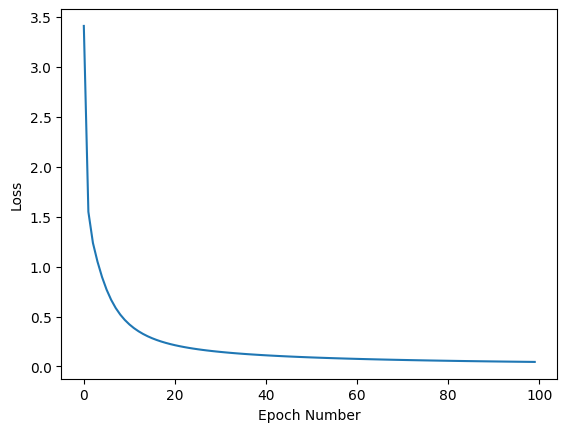

time: 141 ms (started: 2024-12-29 17:54:59 +02:00)


In [23]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (20%)

[[101   0]
 [  3  96]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       101
         1.0       1.00      0.97      0.98        99

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



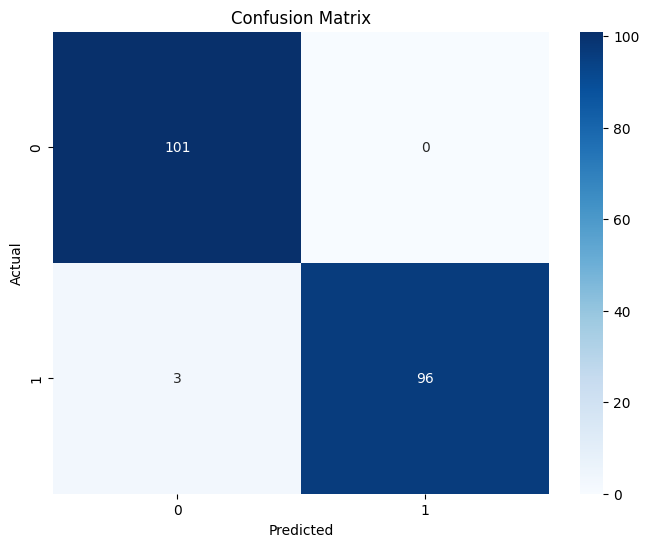

time: 484 ms (started: 2024-12-29 17:54:59 +02:00)


In [24]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.zeros((1,Y.shape[1]))
labels = np.zeros((1,Y.shape[1]))

# Check your predictions against the test's labels
for i in range(Y.shape[1]):
  if (A2[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[0,i]

cm = confusion_matrix(predictions.T, labels.T)

# Print the confusion matrix In order to test your performance
print(cm)
print(classification_report(predictions.T, labels.T))

# plot CM heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Visualize the results

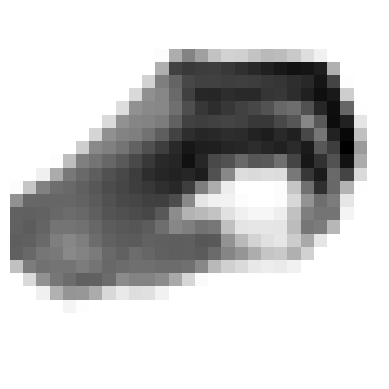

Real= 0 Predicted= [[0.06622164]]


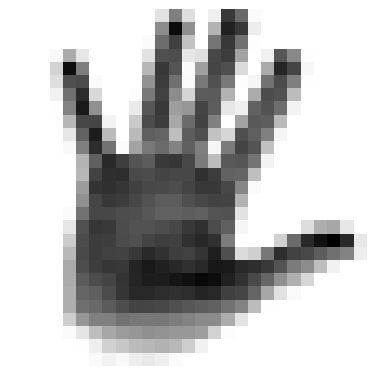

Real= 1 Predicted= [[0.97413996]]


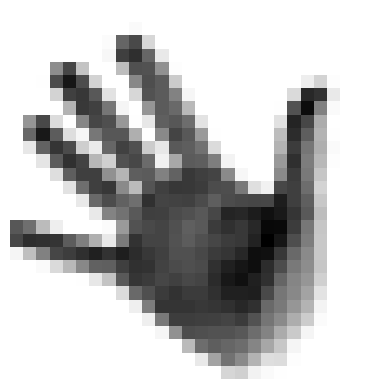

Real= 1 Predicted= [[0.89440067]]


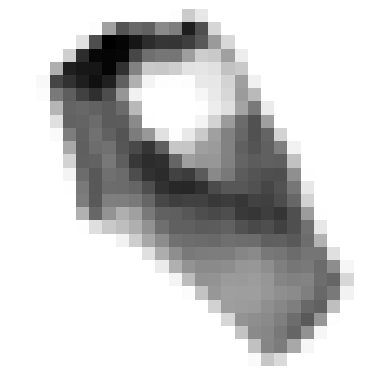

Real= 0 Predicted= [[0.06722262]]


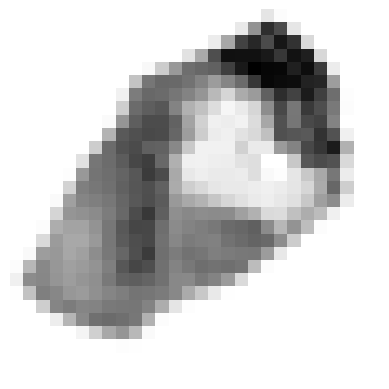

Real= 0 Predicted= [[4.07450614e-05]]


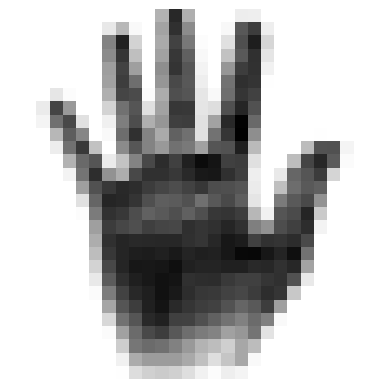

Real= 1 Predicted= [[0.99186049]]


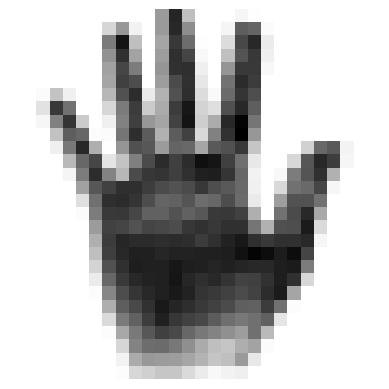

Real= 1 Predicted= [[0.98528437]]


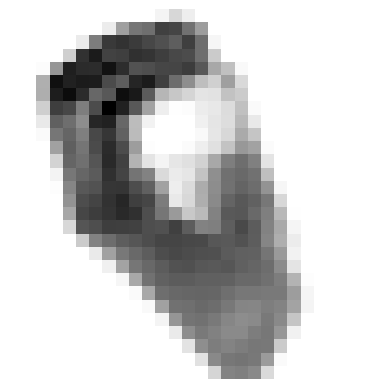

Real= 0 Predicted= [[0.0222015]]


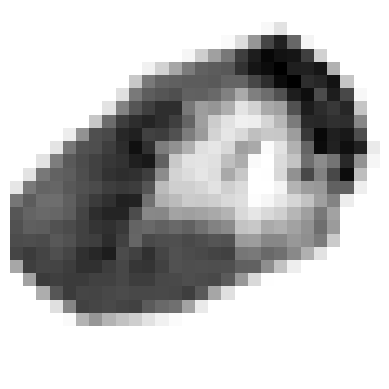

Real= 0 Predicted= [[0.15857679]]


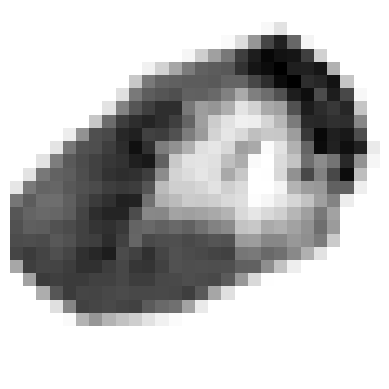

Real= 0 Predicted= [[0.15857679]]
time: 437 ms (started: 2024-12-29 17:55:00 +02:00)


In [25]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random
for example in range(10):
  i = random.randint(200)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[0,i]

  # TODO :  Forward propagation
  Z1 = np.matmul(W1,X_test[:,i])
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2, A1) + b2
  A2 = sigmoid(Z2)

  Yout = Y[0,i]
  print("Real=", Y_test[0,i], "Predicted=",A2)